<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(_1_6)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-1.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_-1.6_n250.csv',
 'data_multi_delta_-1.6_n120.csv',
 'data_multi_delta_-1.6_n60.csv',
 'data_multi_delta_-1.6_n30.csv',
 'data_multi_delta_-1.6_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.6_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,53.957913,-0.047935,63.909979,63.963119,-0.053140
1,0.0,1.0,81.846907,-0.005879,91.841029,91.845568,-0.004539
2,0.0,2.0,52.738903,0.016444,62.755347,62.744395,0.010952
3,0.0,3.0,56.023356,-0.083351,65.940005,66.028078,-0.088072
4,0.0,4.0,48.125528,0.031856,58.157385,58.132103,0.025282
...,...,...,...,...,...,...,...
119995,999.0,115.0,49.556370,0.019724,59.576094,59.558555,0.017539
119996,999.0,116.0,37.072634,0.057420,47.130055,47.073309,0.056746
119997,999.0,117.0,38.342340,0.006456,48.348796,48.343168,0.005628
119998,999.0,118.0,52.353620,0.029934,62.383553,62.356143,0.027410


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,53.957913,-0.047935,63.909979,63.963119,-0.053140
1,0.0,1.0,81.846907,-0.005879,91.841029,91.845568,-0.004539
2,0.0,2.0,52.738903,0.016444,62.755347,62.744395,0.010952
3,0.0,3.0,56.023356,-0.083351,65.940005,66.028078,-0.088072
4,0.0,4.0,48.125528,0.031856,58.157385,58.132103,0.025282
...,...,...,...,...,...,...,...
119995,999.0,115.0,49.556370,0.019724,59.576094,59.558555,0.017539
119996,999.0,116.0,37.072634,0.057420,47.130055,47.073309,0.056746
119997,999.0,117.0,38.342340,0.006456,48.348796,48.343168,0.005628
119998,999.0,118.0,52.353620,0.029934,62.383553,62.356143,0.027410


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    53.957913 -0.047935  63.909979  63.963119 -0.053140
      1.0    81.846907 -0.005879  91.841029  91.845568 -0.004539
      2.0    52.738903  0.016444  62.755347  62.744395  0.010952
      3.0    56.023356 -0.083351  65.940005  66.028078 -0.088072
      4.0    48.125528  0.031856  58.157385  58.132103  0.025282
...                ...       ...        ...        ...       ...
999.0 115.0  49.556370  0.019724  59.576094  59.558555  0.017539
      116.0  37.072634  0.057420  47.130055  47.073309  0.056746
      117.0  38.342340  0.006456  48.348796  48.343168  0.005628
      118.0  52.353620  0.029934  62.383553  62.356143  0.027410
      119.0  32.446638  0.071110  42.517749  42.446753  0.070996

[120000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    53.957913 -0.047935  63.909979  63.963119 -0.053140
      1.0    81.846907 -0.005879  91.841029  91.845568 -0.004539
      2.0    52.738903  0.016444  62.755347  62.744395  0.010952
      3.0    56.023356 -0.083351  65.940005  66.028078 -0.088072
      4.0    48.125528  0.031856  58.157385  58.132103  0.025282
...                ...       ...        ...        ...       ...
999.0 115.0  49.556370  0.019724  59.576094  59.558555  0.017539
      116.0  37.072634  0.057420  47.130055  47.073309  0.056746
      117.0  38.342340  0.006456  48.348796  48.343168  0.005628
      118.0  52.353620  0.029934  62.383553  62.356143  0.027410
      119.0  32.446638  0.071110  42.517749  42.446753  0.070996

[120000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,53.957913,-0.047935,63.909979,63.963119,-0.053140
1,0.0,1.0,81.846907,-0.005879,91.841029,91.845568,-0.004539
2,0.0,2.0,52.738903,0.016444,62.755347,62.744395,0.010952
3,0.0,3.0,56.023356,-0.083351,65.940005,66.028078,-0.088072
4,0.0,4.0,48.125528,0.031856,58.157385,58.132103,0.025282
...,...,...,...,...,...,...,...
119995,999.0,115.0,49.556370,0.019724,59.576094,59.558555,0.017539
119996,999.0,116.0,37.072634,0.057420,47.130055,47.073309,0.056746
119997,999.0,117.0,38.342340,0.006456,48.348796,48.343168,0.005628
119998,999.0,118.0,52.353620,0.029934,62.383553,62.356143,0.027410


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    53.957913 -0.047935  63.909979  63.963119 -0.053140
      1.0    81.846907 -0.005879  91.841029  91.845568 -0.004539
      2.0    52.738903  0.016444  62.755347  62.744395  0.010952
      3.0    56.023356 -0.083351  65.940005  66.028078 -0.088072
      4.0    48.125528  0.031856  58.157385  58.132103  0.025282
...                ...       ...        ...        ...       ...
999.0 115.0  49.556370  0.019724  59.576094  59.558555  0.017539
      116.0  37.072634  0.057420  47.130055  47.073309  0.056746
      117.0  38.342340  0.006456  48.348796  48.343168  0.005628
      118.0  52.353620  0.029934  62.383553  62.356143  0.027410
      119.0  32.446638  0.071110  42.517749  42.446753  0.070996

[120000 rows x 5 columns]

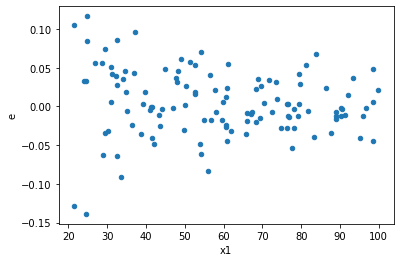

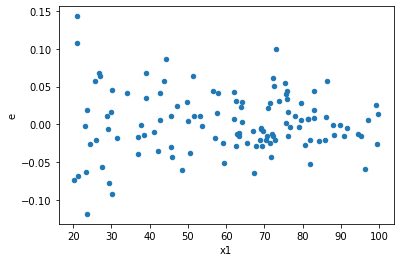

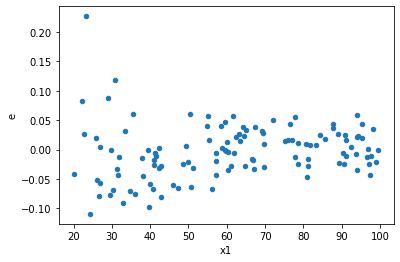

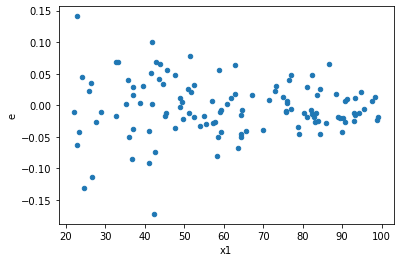

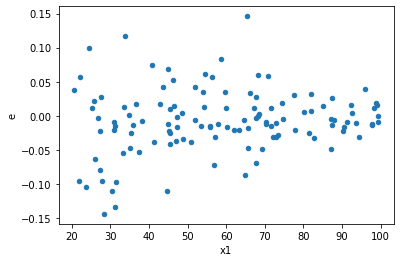

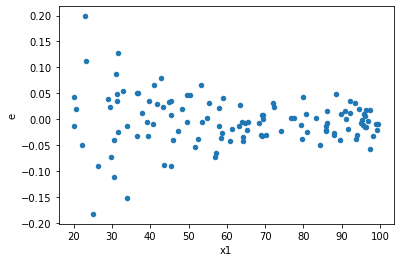

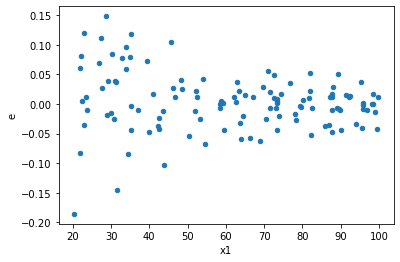

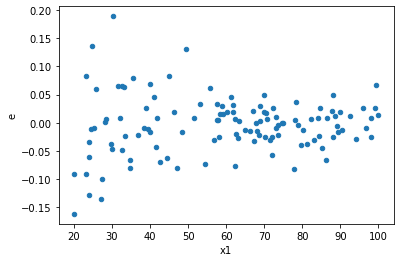

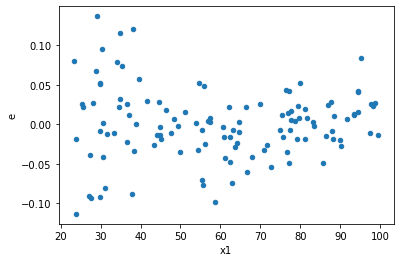

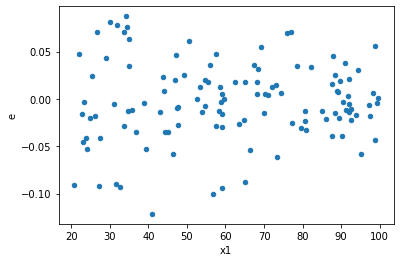

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)

    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,47.0,47.0,0.14177545232406125,0.03366627870126992,0.003016498985618324,0.0007163038021546791,0.23746197348972442,2.433615235602142e-06,Reject001=0 : Heteroscedasticity
1.0,47.0,47.0,0.1320141300687587,0.042521920823294285,0.002808811278058696,0.0009047217196445593,0.3221012841666799,0.00016533140699352518,Reject001=0 : Heteroscedasticity
2.0,47.0,47.0,0.18501190341332494,0.034599465644253265,0.003936423476879254,0.0007361588434947503,0.18701210573979393,5.706619408252079e-08,Reject001=0 : Heteroscedasticity
3.0,47.0,47.0,0.1681971785523152,0.030419884233664738,0.003578663373453515,0.0006472315794396752,0.18085846918177104,3.280161156128528e-08,Reject001=0 : Heteroscedasticity
4.0,47.0,47.0,0.15619848944425435,0.03240604039676513,0.003323372115835199,0.0006894902212077688,0.20746705369599952,3.047743860958203e-07,Reject001=0 : Heteroscedasticity
5.0,47.0,47.0,0.22756957322145233,0.027170021916108726,0.00484190581322239,0.0005780855726831643,0.11939215568888488,2.0780318608186084e-11,Reject001=0 : Heteroscedasticity
6.0,47.0,47.0,0.2222861740710812,0.028889986984950454,0.004729493065342153,0.000614680574147882,0.12996753894244545,1.001487150282472e-10,Reject001=0 : Heteroscedasticity
7.0,47.0,47.0,0.24528609884725663,0.04262378539661773,0.005218853166962907,0.0009068890509918666,0.1737717122859058,1.6785602011067645e-08,Reject001=0 : Heteroscedasticity
8.0,47.0,47.0,0.1516604633672649,0.03567790770072912,0.0032268183695162746,0.0007591044191644494,0.23524857374548946,2.11529787296056e-06,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    980
Reject001=1 : Homoscedasticity       20
Name: Result_test, dtype: int64